<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EB%8D%B0%EC%9D%B4%EC%BD%98/analytics/stacking2(stacking_custom).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install catboost
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.3 MB/s eta 0:00:00


# Import lib & load dataset

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# 시각화 폰트 설정
if os.name =='posix':
    plt.rc("font", family = "AppleGothic")

else:
    plt.rc("font", family = "Malgun Gothic")

# 경고문자 무시
warnings.filterwarnings(action='ignore')


# 데이터 로드
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')
df_info = pd.read_csv('data_info.csv')

# preprocessing & split dataset

In [62]:
## Label Encoding

## train데이터
df_train['preferred_difficulty_level'] = pd.factorize(df_train['preferred_difficulty_level'])[0]
df_train['subscription_type'] = pd.factorize(df_train['subscription_type'])[0]

## test데이터
df_test['preferred_difficulty_level'] = pd.factorize(df_test['preferred_difficulty_level'])[0]
df_test['subscription_type'] = pd.factorize(df_test['subscription_type'])[0]

# scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in [['subscription_duration','recent_login_time','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','abandoned_learning_sessions','community_engagement_level','customer_inquiry_history','payment_pattern']]:
  df_train[i] = scaler.fit_transform(df_train[i])
for i in [['subscription_duration','recent_login_time','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','abandoned_learning_sessions','community_engagement_level','customer_inquiry_history','payment_pattern']]:
  df_test[i] = scaler.transform(df_test[i])

# Delete user_id
df_train = df_train.drop(columns = 'user_id')

# split target
x = df_train[list(df_train.columns[:-1])]
y = df_train['target']

# Delete user_id
df_test = df_test.drop(columns = 'user_id')
# split target
new_x = df_test


## demension reduction

In [63]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis()
# x  = lda.fit_transform(x, y)
# new_x = lda.transform(new_x)

# Modeling

In [64]:
import optuna
from lightgbm import LGBMClassifier,early_stopping
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
import optuna
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.feature_selection import SelectFromModel
model =LGBMClassifier()
model.fit(x_train, y_train)
sfm = SelectFromModel(model,  threshold = 'median')
x_train_trasformed = sfm.fit_transform(x_train, y_train)
x_test_transformed = sfm.transform(x_test)
model.fit(x_train_trasformed, y_train)
model.score(x_test_transformed, y_test)


[LightGBM] [Info] Number of positive: 4957, number of negative: 3043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619625 -> initscore=0.487957
[LightGBM] [Info] Start training from score 0.487957
[LightGBM] [Info] Number of positive: 4957, number of negative: 3043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:Bo

0.59

In [68]:
pd.DataFrame(x_test_transformed)

,0,1,2,3,4,5,6
0,-0.287460,0.357181,15.733048,-0.708374,0.354102,1.038128,0.897074
1,0.470051,0.237594,13.884052,-0.753365,-1.521287,-1.988886,-0.614831
2,-1.044971,-0.479924,14.225555,-0.497869,-0.222941,2.138861,1.393854
3,-1.347975,0.955113,19.504501,-0.146588,-1.521287,-0.062604,1.287897
4,-1.347975,0.715940,18.613273,0.287060,-0.367201,1.313312,0.673894
...,...,...,...,...,...,...,...
1995,-0.590465,-0.001579,16.641179,-0.802494,-1.088505,-1.438520,-1.675391
1996,-1.347975,1.553045,14.658474,-0.787338,1.508188,1.863678,-1.010931
1997,-1.499477,1.074699,13.294821,-0.790540,1.219667,1.588495,-0.322287
1998,-1.196473,-0.599511,21.105407,-0.475224,-1.377026,1.313312,-0.041810


In [55]:
pd.DataFrame(y_train)['target'].value_counts()

1    4957
0    3043
Name: target, dtype: int64

In [56]:
pd.DataFrame(y_test)['target'].value_counts()

1    1242
0     758
Name: target, dtype: int64

## knn

In [42]:
# 목적 함수 정의

# 랜덤 시드 고정
np.random.seed(42)
optuna.logging.set_verbosity(optuna.logging.WARNING)

def obj_knn(trial,x,y):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])

    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights)
    score = cross_val_score(model, x, y, n_jobs=-1, cv=10, scoring='f1_macro')
    f1_macro = np.mean(score)

    return f1_macro

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
# lambda 함수를 사용하여 x와 y를 objective 함수에 전달
study.optimize(lambda trial: obj_knn(trial, x_train, y_train), n_trials = 100)


# 최적 파라미터 출력
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# 최적 파라미터로 모델 학습
best_params = study.best_trial.params
knn_model = KNeighborsClassifier(**best_params)

Best trial:
  Value: 0.52075703729583
  Params: 
    n_neighbors: 11
    metric: manhattan
    weights: distance


In [43]:
knn_model.fit(x_train, y_train)
y_test_pred = knn_model.predict(x_test)
f1_score(y_test, y_test_pred, average = 'macro')

0.5120618261321008

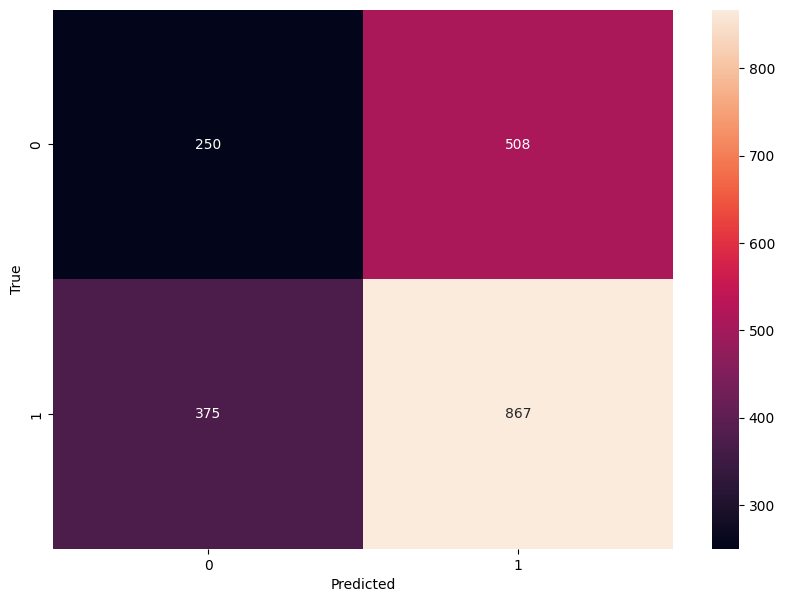

In [44]:
# 혼동행렬



from sklearn.metrics import confusion_matrix
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_test_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [45]:
from sklearn.metrics import classification_report

# 클래스별 성능 지표 출력
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.40      0.33      0.36       758
           1       0.63      0.70      0.66      1242

    accuracy                           0.56      2000
   macro avg       0.52      0.51      0.51      2000
weighted avg       0.54      0.56      0.55      2000



# 최종 예측

In [47]:
y_pred = knn_model.predict(new_x)
pd.DataFrame(y_pred)[0].value_counts()

1    6914
0    3086
Name: 0, dtype: int64

In [37]:
df_sub['target'] = y_pred
df_sub.set_index('user_id').to_csv('knn_lda_label.csv',encoding = 'cp949')